### INTRODUCTION

본 보고서는 지진 모사 프로그램인 SIMQKE의 알고리즘 및 성능을 문서화 한것이다. 지진 시뮬레이션의 동기 및 대안이 될 수 있는 방법들에 대해 간단히 알아본다. 그리고 SIMQKE에서 사용된 알고리즘의 기반이 되는 이론 개발에 대해 논의한다. 마지막으로 프로그램을 사용해 parametric study를 하고 생성된 지진의 특성에 대해 논한다. 프로그램 자체와 간략한 사용자 매뉴얼도 첨부되어 있다.

구조응답 및 2차 계통의 응답을 얻기위한 시간이력 동해석에 널리 사용하기 위해 기록된 가속도 시간이력이 별로 없다는 것이 시뮬레이션을 개발하게 된 주된 동기이다. 실제 지진 기록들은 랜덤 변수들 (크기, 진앙 깊이, 감쇠 특성, 주파수 성분, 지속시간 등)이 유일한 조건이고, 다시는 일어나지 않을 조건이며, 설계목적에 적합하지 않을 수 있다는 점에서 한계가 있다. 예를 들어, Jennings, Housner, Tsai (19)는 오늘날 지진 기록들의 주된 문제점은 매우 강한 (리히터 규모 8) 지진에 대한 기록이 없다는 것이라고 지적했다. 그들의 목적은 그러한 강한 지진을 예측하고 모사하는 것이었다. 이와 유사하게 Hou (15)의 방법은 크기 및 진앙 깊이와 같은 변수들을 입력으로 가졌다. 그의 목적은 특정 지역의 유사 거동을 예측하는 것이었다.

위의 필요성 및 지진이 과도 확률 과정(transient stochastic process)이라는 Housner의 인지(16)로부터, 수많은 수학적 모델들이 제안되어 오고 있으며 사용되었다. 참고문헌 (15)와 (19)는 모사 기법들에 대한 역사를 간략히 소개한다.

여기서의 목적은 일반적으로 사용되는 수치 모사 방법 하나에 초점을 맞춘다. 이 방법은 정현파 조합으로 모든 주기 함수를 표현할 수 있다는 사실을 기반으로 한다.

$$x(t) = \sum_{i=1}^n A_i sin(\omega_i t + \phi_i)\tag{1}$$

$A_i$는 크기이고, $\phi_i$는 i 번째 정현파의 위상각이다. 크기를 고정하고 위상각을 다르게 생성하면, 모양(주파수 성분)이 비슷하지만 자세히 보면 다른 거동을 만들 수 있다. 컴퓨터는 난수생성기를 사용해 균일 분포를 따르는 위상각을 0에서 $2\pi$ 사이에서 생성한다.

정상상태 거동의 전체 파워 $x(t)$는 $\sum_{i=1}^n(A_i^2/2)$이다. 식 1에서 주파수 $\omega_i$가 동일한 간격 $\Delta \omega$로 선택되었다고 가정하자. **그림 1**은 $\omega_i$에서의 값이 $A_i^2/2\Delta \omega$이고 따라서 $G(\omega_i)\Delta\omega=A_i^2/2$를 만족하는 함수 $G(\omega)$를 보여준다. 거동에서 정현파의 개수가 매우 많아지도록 하면, 전체 파워는 연속 커브 $G(\omega)$의 아래쪽 면적과 같아질 것이고, 이는 스펙트럼밀도함수이다. $G(\omega)$에 대한 공식적인 정의는 많은 서적들 (Cranedall and Mark, 1963, Y.K. Lin, 1970)에서 확인 가능하다. $G(\omega)$는 특정 주파수 대역 내의 추파수를 갖는 정현파의 상대적인 중요성 (즉, 전체 파워에 대한 상대적인 기여도)를 나타낸다. $G(\omega)$가 한개 주파수 주변에서 얇게(narrow) 분포하면, 식 1은 **그림 2a**와 같이 거의 정현파와 같은 모양을 만들게 된다. 반면, 스펙트럼 밀도 함수가 광대역에 걸쳐 거의 상수에 가까우면, 다양한 주파수를 갖는 성분들이 거동 강도가 경쟁적으로 기여하게 되어 **그림 2b**에 나타난 것과 같이 지진 기록과 비슷한 거동을 보이게 될 것이다. 물론, 식 1을 사용하여 생성된 거동의 전체 파워 및 상대적인 주파수 성분은 시간에 따라 변하지 않는다. 실제 지진의 과도 특성을 부분적으로 모사하기 위하여 보통, 정상(stationary) 거동 $x(t)$에 **그림 3**에 나타난 boxcar, 평행사변형 (Hou, 1968), 지수형 (Liu, 1969), 혼합형 (Jennings, 1968) 함수들과 같이 미리 결정된 강도 함수를 곱하여 사용한다.

Bycroft(1960)와 Brady(1966)는 지진 지반 거동을 모사하기위해 백색소음(이론적으로 모든 주파수에서 $G(\omega)$는 상수)을 사용했다. 사실 작업하기 수월한 형태의 $G(\omega)$는 band limited white noise이다. 이는 **그림4a**에 나타난 바와 같이 주파수 범위가 0에서 $\omega_1$까지는 스펙트럼밀도가 상수이고 나머지 범위에서는 0이다.

$$G(\omega)=\begin{cases} 
= G_0\;\; 0 \leq \omega \leq \omega_1 \\
= 0\;\; \omega > \omega_1
\end{cases}
\tag{2}$$

제한된 개수로 기록된 강진거동의 주파수 성분들에 대한 Kanai (1961)의 연구를 기반으로 Tajimi (1960)는 다음과 같은 지반거동을 표현하는데 널리 사용되는 스펙트럼밀도 식을 제안했다. (**그림 4b**)

$$G(\omega)=\frac{[1+4\zeta_g^2(\omega/\omega_g)^2]G_0}{[1-(\omega/\omega_g)^2]^2+4\zeta_g^2(\omega/\omega_2)^2}\tag{3}$$

소비에트 연구원들(Barstein, 1960, Bolotin, 1969) 식3의 스펙트럼밀도와 같은 형태의 자기상관함수(autocorrelation)를 기반으로 지진공학에 대한 확률론적 접근법을 제안하였다.

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def G_kanai(w,wg,zetag,G0):
    r = w/wg;
    A = (1+4*(zetag**2)*r**2)*G0;
    B = ((1-r**2)**2)+4*(zetag**2)*(r**2);
    return A/B;

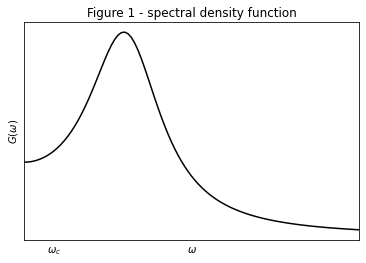

In [19]:
w = np.linspace(0,30,101);
plt.plot(w,G_kanai(w,10,0.4,1),'k-');
ax = plt.gca()
plt.xlim(0,30);
plt.xticks([]); plt.yticks([]);
plt.xlabel('$\omega$');
plt.ylabel('$G(\omega)$');
plt.text(2,-0.2,'$\omega_c$');
plt.title('Figure 1 - spectral density function');